# Loading Library, Configuration Files and Other Stuff

In [9]:
import os
from ctypes import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widget
from IPython.display import display
from rich.jupyter import print
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%config InlineBackend.figure_format = "svg" # crisper plots
import numpy as np
import pandas as pd

from thewidgets import *
from xmagix import XMagix, console

paramWidgets = InputParamWidgets()

cwd = os.getcwd()
xmagix = XMagix("lib/libhandel.so")
inifile = cwd + "/microdxp_usb2.ini"
configfile = cwd + "/config.ini"

paramWidgets = InputParamWidgets()

[12:33:36] Library loaded successfully 😄                                                              ]8;id=488052;file:///home/hunter/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=844074;file:///home/hunter/xraythesis-handel/myapp/xmagix.py#30\30]8;;\

# Starting System and Initializing Parameters

Available Log Levels:
```
1:  MD_ERROR
2:  MD_WARNING
3:  MD_INFO
4:  MD_DEBUG
```

In [10]:
xmagix.setLogging(4)
xmagix.exit()
xmagix.init(inifile)
xmagix.startSystem()

           Logfile set to /tmp/xmagix.log                                                              ]8;id=336509;file:///home/hunter/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=900965;file:///home/hunter/xraythesis-handel/myapp/xmagix.py#69\69]8;;\

           Exiting...                                                                                  ]8;id=375443;file:///home/hunter/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=5052;file:///home/hunter/xraythesis-handel/myapp/xmagix.py#46\46]8;;\

           Loading system...                                                                           ]8;id=425044;file:///home/hunter/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=668046;file:///home/hunter/xraythesis-handel/myapp/xmagix.py#46\46]8;;\

           Starting system...                                                                          ]8;id=947340;file:///home/hunter/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=346996;file:///home/hunter/xraythesis-handel/myapp/xmagix.py#46\46]8;;\

# Setting and Getting Parameters

Get all currently set acquisition values.

In [11]:
values = xmagix.getAcquisitionValues(name="all")
values = pd.DataFrame(values.items(), columns=["Parameter", "Value"])
print(values.sort_values(by=["Parameter"]))

Parameter       Value
26        adc_trace_wait     0.02500
27    auto_adjust_offset     1.00000
7        baseline_length   512.00000
9     baseline_threshold   120.00000
25         bytes_per_bin     3.00000
3            clock_speed    40.00000
4        energy_gap_time     0.30000
10      energy_threshold     0.00000
2                  fippi     0.00000
19                  gain     4.49937
20             gain_trim     1.00000
1                 genset     0.00000
13             max_width     0.40000
24         mca_bin_width     1.00000
23   number_mca_channels  8192.00000
28        number_of_scas     0.00000
0                 parset     2.00000
15         peak_interval     0.50000
11  peak_interval_offset     0.50000
14             peak_mode     0.00000
16           peak_sample     0.30000
12    peak_sample_offset     0.30000
17              polarity     1.00000
18          preamp_value     5.00000
21           preset_type     1.00000
22          preset_value    60.00000
6       trigger_gap_time     0.30000
5      trigger_peak_time     0.05000
8      trigger_threshold   150.00000

Get available peaking times

In [12]:
ccurrentPeakingTimes = xmagix.getNumberOfPeakingTimes()
currentPeakingTimes = np.ctypeslib.as_array(ccurrentPeakingTimes)

[12:33:37] Getting number of peaking times per fippi... 24                                             ]8;id=319045;file:///home/hunter/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=797355;file:///home/hunter/xraythesis-handel/myapp/xmagix.py#46\46]8;;\

           Getting current peaking times...                                                            ]8;id=630760;file:///home/hunter/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=378966;file:///home/hunter/xraythesis-handel/myapp/xmagix.py#46\46]8;;\

## Setting Peaking Time, Bin Width and MCA-Channels

In [13]:
idict = {"manual": True, "manual_name":"Set"}
pt = interactive(xmagix.setAcquisitionValues, idict, name=fixed("parset"), value=widgets.Dropdown(options=currentPeakingTimes.round(2).tolist(), value=2.4, description="Peaking Time"))
bw = interactive(xmagix.setAcquisitionValues, idict, name=fixed("mca_bin_width"), value=widgets.FloatText(value=1, description="Bin Width"))
nMCA = interactive(xmagix.setAcquisitionValues, idict, name=fixed("number_mca_channels"), value=widgets.FloatText(value=8192, description="No. MCA"))
ui1 = widgets.HBox([pt, bw, nMCA])
ui1


## Setting Thresholds

* Trigger: 0-4095
* Baseline: 0-4095
* Energy: 0-4095

In [14]:
th_trigger = interactive(xmagix.setAcquisitionValues, idict, name=fixed("trigger_threshold"), value=widgets.FloatText(value=150, description="Trigger Thr."))
th_baseline = interactive(xmagix.setAcquisitionValues, idict, name=fixed("baseline_threshold"), value=widgets.FloatText(value=120, description="Baseline Thr."))
th_energy = interactive(xmagix.setAcquisitionValues, idict, name=fixed("energy_threshold"), value=widgets.FloatText(value=0, description="Energy Thr."))
ui2 = widgets.HBox([th_trigger, th_baseline, th_energy])
ui2

## Setting Gain

* Gain: 1-100
* Gain Trim: 0.5-2.0

In [7]:
gain = interactive(xmagix.setAcquisitionValues, idict, name=fixed("gain"), value=widgets.FloatText(value=4.4994, description="Gain"))
gain_trim = interactive(xmagix.setAcquisitionValues, idict, name=fixed("gain_trim"), value=widgets.FloatText(value=1, description="Gain Trim"))
gap_time = interactive(xmagix.setAcquisitionValues, idict, name=fixed("trigger_gap_time"), value=widgets.FloatText(value=.3, description="Gap Time"))
ui3 = widgets.HBox([gain, gain_trim, gap_time])
ui3

# Starting and Stopping a Run

## Fixed Realtime Run

In [15]:
realtime = input()

In [16]:
xmagix.fixedRealtimeRun(realtime, clearMca=True)

[12:34:01] Setting 'preset_type' to 1.0...                                                             ]8;id=516373;file:///home/hunter/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=581124;file:///home/hunter/xraythesis-handel/myapp/xmagix.py#46\46]8;;\

           Setting 'preset_value' to 60.0...                                                           ]8;id=375241;file:///home/hunter/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=324571;file:///home/hunter/xraythesis-handel/myapp/xmagix.py#46\46]8;;\

           Starting Run...                                                                             ]8;id=466011;file:///home/hunter/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=157125;file:///home/hunter/xraythesis-handel/myapp/xmagix.py#46\46]8;;\

Output()

# Pull Data and Plot

In [17]:
cmca = xmagix.pullMcaData()

[12:35:55] number_mca_channels: 8192.0                                                                ]8;id=511862;file:///home/hunter/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=934502;file:///home/hunter/xraythesis-handel/myapp/xmagix.py#224\224]8;;\

           Pulling MCA...                                                                              ]8;id=470722;file:///home/hunter/xraythesis-handel/myapp/xmagix.py\xmagix.py]8;;\:]8;id=839272;file:///home/hunter/xraythesis-handel/myapp/xmagix.py#46\46]8;;\

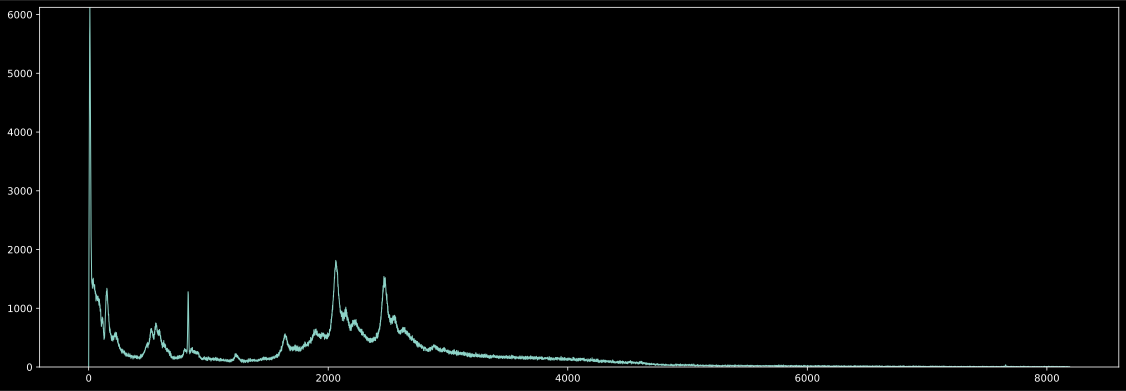

In [52]:
mca = np.ctypeslib.as_array(cmca)
if np.max(mca) != 0:
    # Nightowl mode
    plt.style.use("default")
    plt.style.use("dark_background")
    cm = 1/2.54 # inch to cm, metric like brrr
    size = 60

    titles = ["MCA 8192"]
    x = np.arange(0, 8192, 1)
    fig, ax = plt.subplots(1,1,figsize=(40*cm, 25*(9/16)*cm))
    ax.plot(x, mca, linewidth=1)
    # ax.set_xlim(0, 180)
    ax.set_ylim(0, np.max(mca))
    plt.tight_layout()
    if not os.path.exists("./tmp/"):
        os.makedirs("./tmp/") 
    plt.savefig("./tmp/plot.svg")
    plt.savefig("./tmp/plot.png")
    SVG("./tmp/plot.svg")
else:
    console.log(f"[dark_orange] :warning: No events detected!")

In [53]:
#csvPath = input()
csvPath = "Pb_XRF"
if not os.path.exists(f"./{csvPath}"):
    os.makedirs(f"./{csvPath}")
os.rename("./tmp/plot.svg", f"./{csvPath}/{csvPath}.svg")
os.rename("./tmp/plot.png", f"./{csvPath}/{csvPath}.png")
with open(f"./{csvPath}/{csvPath}.csv", "x") as f:
    values.to_csv(f, sep=";", index=False)
    mcapd = pd.DataFrame(mca)
    f.write("BEGIN_OF_DATA")
    mcapd.to_csv(f, sep=";")
    f.write("END_OF_DATA")